        0         1         2         3         4         5         6    \
0  0.905882  0.898039  0.894118  0.894118  0.874510  0.878431  0.890196   
1  0.909804  0.917647  0.913725  0.905882  0.882353  0.878431  0.862745   
2  0.886275  0.894118  0.886275  0.890196  0.894118  0.913725  0.894118   
3  0.858824  0.878431  0.878431  0.901961  0.909804  0.901961  0.886275   
4  0.898039  0.890196  0.909804  0.921569  0.913725  0.901961  0.882353   
5  0.894118  0.878431  0.901961  0.921569  0.901961  0.882353  0.913725   
6  0.882353  0.878431  0.874510  0.878431  0.886275  0.894118  0.898039   
7  0.878431  0.874510  0.874510  0.862745  0.870588  0.882353  0.874510   
8  0.882353  0.886275  0.890196  0.890196  0.901961  0.905882  0.874510   
9  0.878431  0.862745  0.866667  0.874510  0.901961  0.917647  0.905882   

        7         8         9      ...          530       531       532  \
0  0.890196  0.866667  0.854902    ...     0.854902  0.858824  0.866667   
1  0.858824  0.866667  0

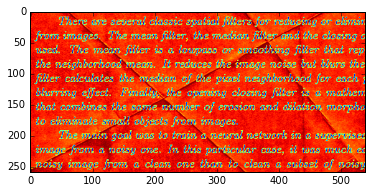

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img = mpimg.imread("/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/train/6.png")
import pandas as pd
dat = pd.DataFrame(img)
print(dat.head(10))
plt.imshow(img)
plt.show()

          X    Y
0  0.894118  1.0
1  0.894118  1.0
2  0.890196  1.0
3  0.894118  1.0
4  0.882353  1.0
5  0.874510  1.0
6  0.886275  1.0
7  0.905882  1.0
8  0.882353  1.0
9  0.882353  1.0


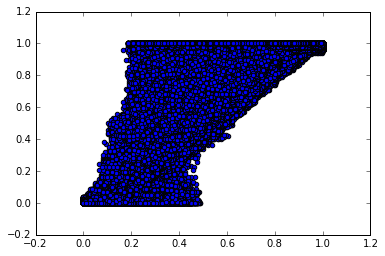

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from PIL import Image
#img = mpimg.imread("/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/train/6.png")

from os import listdir
from os.path import isfile, join
#files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
dirtyFolder = "/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/train"
#dirtyFolder = "G:/Denoising_Dirty_Documents/train"
cleanFolder = "/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/train_cleaned"
#cleanFolder = "G:/Denoising_Dirty_Documents/train_cleaned"
output_csv = "/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/output.csv"
#output_csv = "G:/Denoising_Dirty_Documents/output.csv"

p = np.empty((0,1))
q = np.empty((0,1))
for index,f in enumerate(listdir(dirtyFolder)):    
   if isfile:
     fileNames = np.array(join(dirtyFolder,f))
     inpImg = mpimg.imread(join(dirtyFolder,f))
     outImg = mpimg.imread(join(cleanFolder,f))
     # Alternatively PIL can also be used - np.array(Image.open("G:/Denoising_Dirty_Documents/train/6.png"))/255  
     x = np.array(inpImg) 
     x_vec = np.reshape(x,(x.size,1))
     y = np.array(outImg)  
     y_vec = np.reshape(y,(y.size,1))
     #Create DataFrames
     dat = pd.DataFrame({'X':x_vec[:,0],'Y':y_vec[:,0]})
     if index == 0:
        dat.to_csv(output_csv, index = False)
     else :
        dat.to_csv(output_csv,header=None, mode="a", index = False)

#Read the training data from the csv as a dataframe
train_data = pd.read_csv(output_csv)
print(train_data.head(10))
plt.scatter(train_data.X, train_data.Y)
#train_data.plot(kind = 'scatter',x='X', y='Y')

In [9]:
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
#plt.figure(figsize=(5,5))
import pandas as pd
import numpy as np
#output_csv = "/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/output.csv"
output_csv = "G:/Denoising_Dirty_Documents/output.csv"
#pred_csv = "/home/Dhaneesh/Downloads/Denoising_Dirty_Documents/pred.csv"
pred_csv = "G:/Denoising_Dirty_Documents/pred.csv"
train_data = pd.read_csv(output_csv)
model = linear_model.LinearRegression()
td = train_data[(train_data.Y >0.05) & (train_data.Y<0.95)]
model.fit(td.X.reshape(-1,1),td.Y)
#model_data = [max(min(x, 1),0) for x in train_data.X]
model_predicted = model.predict(train_data[['X']])
def ceilNFloor(x):
    #To make sure the predicted values fall in the range - (0,1)
    y = max(min(x, 1),0)
    return y
pred = pd.DataFrame({'X_Predicted':model_predicted[:]})
pred['X_Predicted'] = pred.applymap(ceilNFloor)
pred.to_csv(pred_csv, index = False)
#plt.scatter(pred.X_Predicted,train_data.Y)
from sklearn.metrics import mean_squared_error
rms1 = np.sqrt(mean_squared_error(train_data.X, train_data.Y))
rms2 = np.sqrt(mean_squared_error(pred.X_Predicted, train_data.Y))
print(rms1)
print(rms2)
#Persisting the model
from sklearn.externals import joblib
modelFile = "G:/Denoising_Dirty_Documents/Models/lin_model.sav"
joblib.dump(model,modelFile)
print("Model Persisted Successfully!!")


0.157081994821
0.0778613719813
Model Persisted Successfully!!


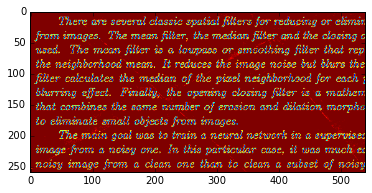

In [10]:
from sklearn.externals import joblib
%matplotlib inline
from sklearn import linear_model
import matplotlib.pyplot as plt
#plt.figure(figsize=(5,5))
import pandas as pd
import numpy as np

def ceilNFloor(x):
    #To make sure the predicted values fall in the range - (0,1)
    y = max(min(x, 1),0)
    return y
model =  joblib.load("G:/Denoising_Dirty_Documents/Models/lin_model.sav")

#Applying Linear model to a sample image(that does particularlly well with linear regression)
import matplotlib.image as mpimg
samImg = mpimg.imread("G:/Denoising_Dirty_Documents/train/6.png")
x_sam = np.array(samImg)
dim = np.shape(x_sam)
x_vec_sam = np.reshape(x_sam,(x_sam.size,1))
predicted_value = model.predict(x_vec_sam)
#Vectorize function Issue
##########################
#y_sam = np.reshape(sam_prediction,(dim[0],dim[1]))
#ceilNFloor_vec = np.vectorize(ceilNFloor)
#y_sam_fltr = ceilNFloor_vec(y_sam)
##########################
df_pred = pd.DataFrame({'Sample_Prediction':predicted_value[:]})
df_pred['Sample_Prediction'] = df_pred.applymap(ceilNFloor)
sam_out = np.reshape(df_pred.values,(dim[0],dim[1]))
plt.imshow(sam_out)
plt.show()
#samOutImg = mpimg.imread(y_sam)
#samOutImg.show()